In [1]:
import opendatasets as od

import os
# os.environ["PYARROW_IGNORE_TIMEZONE"] = "1"

import pandas as pd
# import pyspark.pandas as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white", palette="muted", color_codes=True)

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 20

In [2]:
# od.download("https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data")

In [3]:
folder = "store-sales-time-series-forecasting"

datasets = [folder + "/" + f for f in os.listdir('store-sales-time-series-forecasting')]

In [4]:
datasets

['store-sales-time-series-forecasting/holidays_events.csv',
 'store-sales-time-series-forecasting/oil.csv',
 'store-sales-time-series-forecasting/sample_submission.csv',
 'store-sales-time-series-forecasting/stores.csv',
 'store-sales-time-series-forecasting/test.csv',
 'store-sales-time-series-forecasting/train.csv',
 'store-sales-time-series-forecasting/transactions.csv']

#### holidays_events

In [5]:
holiday_df = pd.read_csv(datasets[0], parse_dates = ["date"])

In [6]:
for col in holiday_df.columns[1:]:
    print(col)
    print("*" * len(col))
    print(holiday_df[col].value_counts())
    print()

type
****
Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: type, dtype: int64

locale
******
National    174
Local       152
Regional     24
Name: locale, dtype: int64

locale_name
***********
Ecuador                           174
Quito                              13
Riobamba                           12
Guaranda                           12
Latacunga                          12
Ambato                             12
Guayaquil                          11
Cuenca                              7
Ibarra                              7
Salinas                             6
Loja                                6
Santa Elena                         6
Santo Domingo de los Tsachilas      6
Quevedo                             6
Manta                               6
Esmeraldas                          6
Cotopaxi                            6
El Carmen                           6
Santo Domingo                       6
Machala             

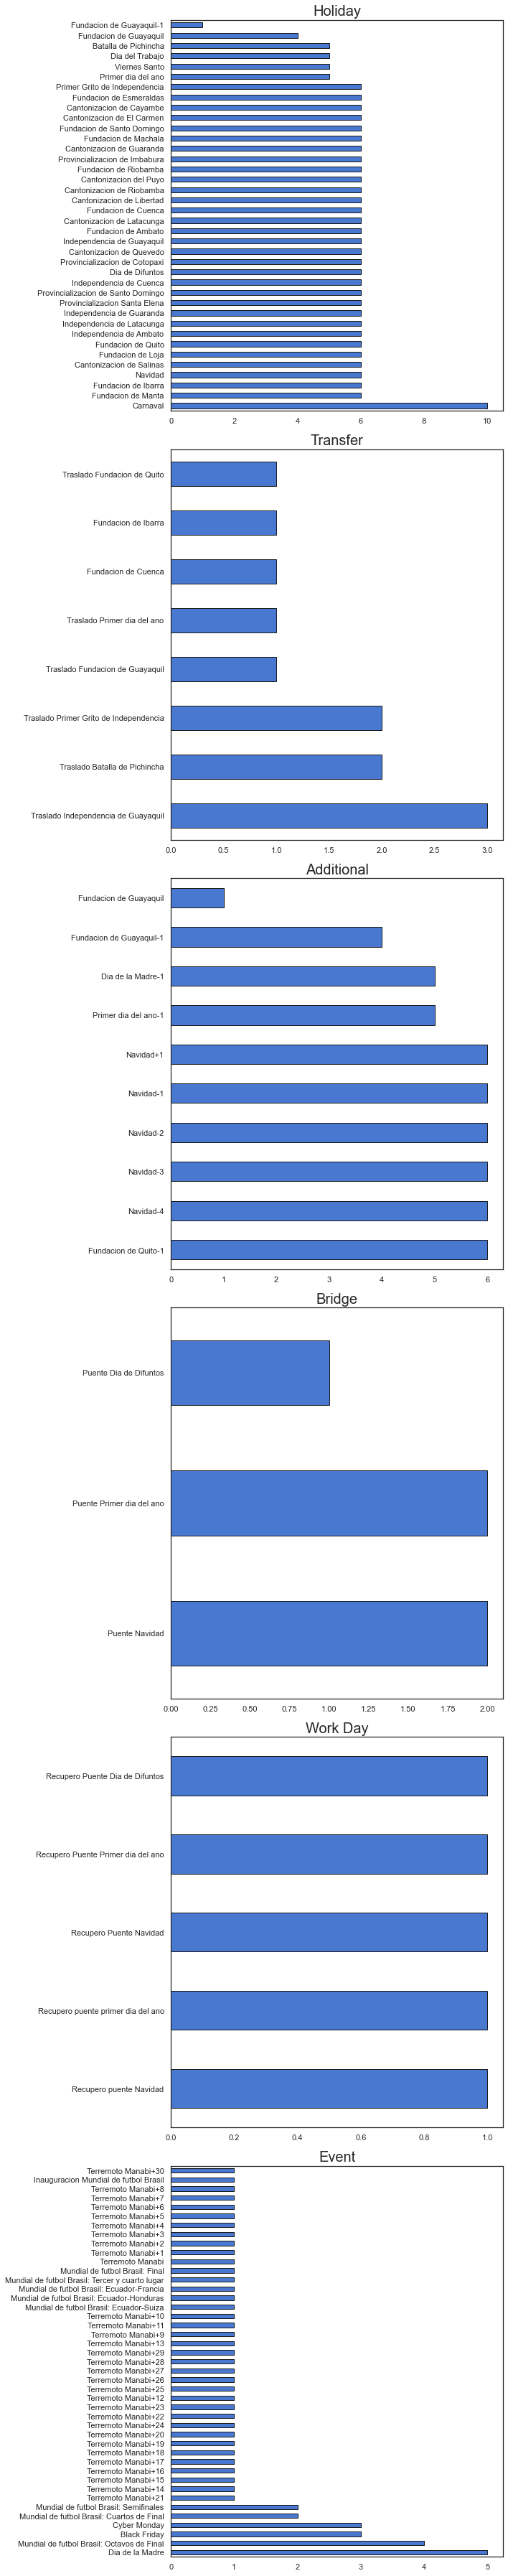

In [7]:
fig, axes = plt.subplots(6, 1, figsize = (10, 50), tight_layout = True)

for name, ax in zip(holiday_df["type"].unique(), axes.flatten()):
    
    holiday_df.loc[holiday_df["type"].eq(name), "description"].value_counts().\
    plot(kind = "barh", ax=ax, edgecolor = "k");
    
    ax.set_title(name)

### oil

In [8]:
oil_df = pd.read_csv(datasets[1], parse_dates = ["date"], index_col = "date")

In [9]:
oil_df.info() # some missing values exists

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1218 entries, 2013-01-01 to 2017-08-31
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dcoilwtico  1175 non-null   float64
dtypes: float64(1)
memory usage: 19.0 KB


In [10]:
oil_df.isna().sum()

dcoilwtico    43
dtype: int64

In [11]:
oil_df.index.freq = "B"

In [12]:
oil_df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-07', '2013-01-08', '2013-01-09', '2013-01-10',
               '2013-01-11', '2013-01-14',
               ...
               '2017-08-18', '2017-08-21', '2017-08-22', '2017-08-23',
               '2017-08-24', '2017-08-25', '2017-08-28', '2017-08-29',
               '2017-08-30', '2017-08-31'],
              dtype='datetime64[ns]', name='date', length=1218, freq='B')

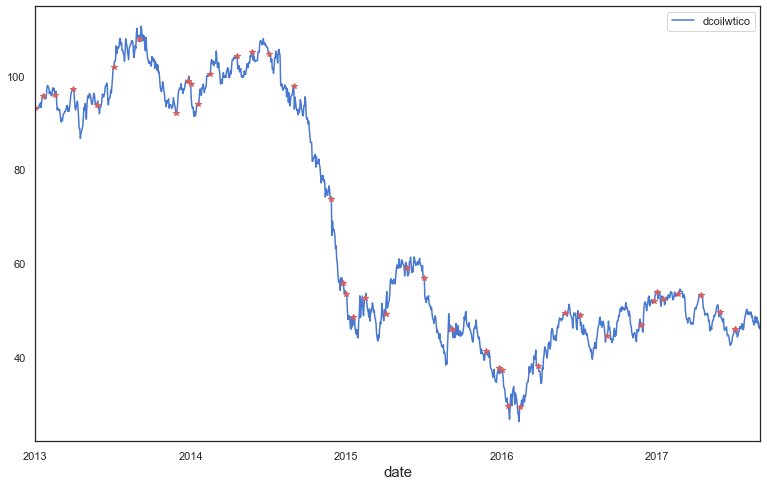

In [13]:
oil_df_imputed = oil_df.fillna(method  = "ffill").fillna(method  = "bfill")

ax = oil_df_imputed.plot(figsize = (13, 8), linestyle="-");
oil_df_imputed[oil_df.isnull()].plot(ax=ax, legend=None, marker="*", color="r", linestyle="-");

### stores

In [14]:
store_df = pd.read_csv(datasets[3])
store_df.head()

store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4

In [15]:
for col in store_df.columns[1:]:
    print(col)
    print("*" * len(col))
    print(store_df[col].value_counts())
    print()

city
****
Quito            18
Guayaquil         8
Cuenca            3
Santo Domingo     3
Manta             2
Latacunga         2
Machala           2
Ambato            2
Quevedo           1
Esmeraldas        1
Loja              1
Libertad          1
Playas            1
Daule             1
Babahoyo          1
Salinas           1
Puyo              1
Guaranda          1
Ibarra            1
Riobamba          1
Cayambe           1
El Carmen         1
Name: city, dtype: int64

state
*****
Pichincha                         19
Guayas                            11
Santo Domingo de los Tsachilas     3
Azuay                              3
Manabi                             3
Cotopaxi                           2
Tungurahua                         2
Los Rios                           2
El Oro                             2
Chimborazo                         1
Imbabura                           1
Bolivar                            1
Pastaza                            1
Santa Elena                    

In [16]:
np.sort(store_df["store_nbr"].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54], dtype=int64)

In [17]:
store_groups = \
store_df[["store_nbr", "type"]].drop_duplicates().sort_values("type", ignore_index = True)

store_groups

store_nbr type
0          52    A
1          51    A
2          50    A
3          49    A
4          48    A
5          47    A
6          46    A
7          45    A
8          44    A
9          18    B
10         39    B
11         31    B
12         11    B
13         20    B
14         34    B
15          9    B
16         21    B
17         33    C
18         30    C
19         40    C
20         32    C
21         54    C
22         19    C
23         35    C
24         17    C
25         16    C
26         15    C
27         14    C
28         13    C
29         12    C
30         10    C
31         22    C
32         42    D
33         41    D
34         38    D
35         37    D
36          1    D
37          8    D
38          2    D
39          3    D
40          4    D
41          5    D
42          6    D
43          7    D
44         27    D
45         24    D
46         25    D
47         26    D
48         53    D
49         23    D
50         36    E
51         43    E
52         28    E
53         29    E

### Train

In [18]:
# train_df = ps.read_csv(datasets[5])
# ps.to_datetime(train_df["date"])

In [19]:
train_df = pd.read_csv(datasets[5], parse_dates=["date"]).drop("id", axis = 1)

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 5 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   store_nbr    int64         
 2   family       object        
 3   sales        float64       
 4   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 114.5+ MB


In [21]:
train_df.isnull().sum()

date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [22]:
train_df["family"].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

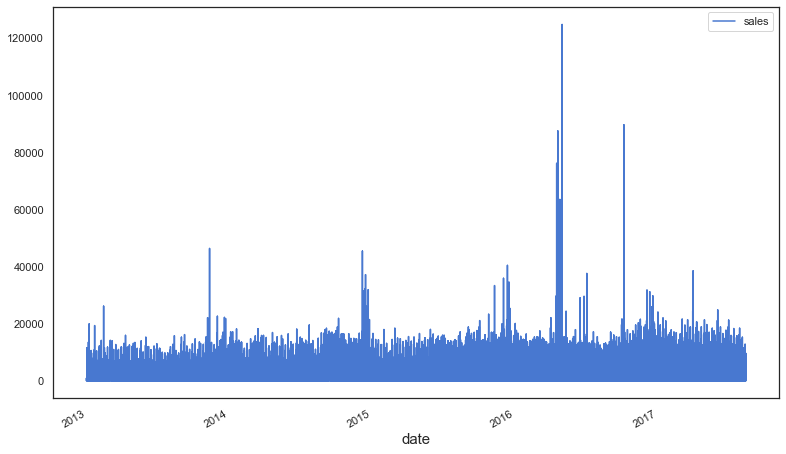

In [23]:
train_df.set_index("date").plot(y = "sales", figsize = (13, 8));

In [24]:
train_df["date"].dt.day

0           1
1           1
2           1
3           1
4           1
           ..
3000883    15
3000884    15
3000885    15
3000886    15
3000887    15
Name: date, Length: 3000888, dtype: int64

In [25]:
train_df["day"] = train_df["date"].dt.day
train_df["month"] = train_df["date"].dt.month
train_df["year"] = train_df["date"].dt.year
train_df["day_of_week"] = train_df["date"].dt.dayofweek
train_df["day_of_year"] = train_df["date"].dt.dayofyear
train_df["is_weekend"] = train_df["date"].dt.dayofweek > 4

train_df.head()

date  store_nbr      family  sales  onpromotion  day  month  year  \
0 2013-01-01          1  AUTOMOTIVE    0.0            0    1      1  2013   
1 2013-01-01          1   BABY CARE    0.0            0    1      1  2013   
2 2013-01-01          1      BEAUTY    0.0            0    1      1  2013   
3 2013-01-01          1   BEVERAGES    0.0            0    1      1  2013   
4 2013-01-01          1       BOOKS    0.0            0    1      1  2013   

   day_of_week  day_of_year  is_weekend  
0            1            1       False  
1            1            1       False  
2            1            1       False  
3            1            1       False  
4            1            1       False

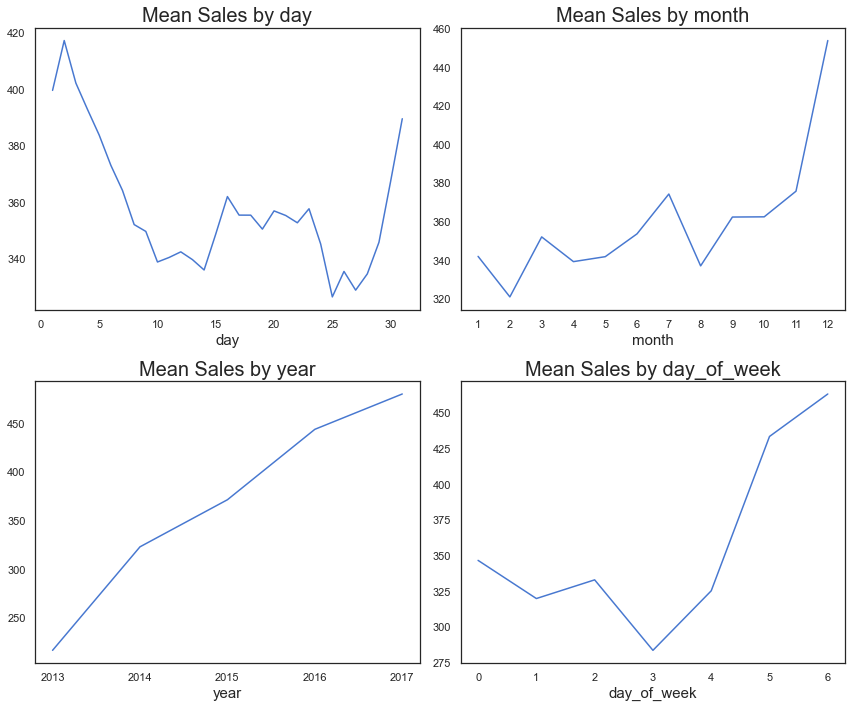

In [26]:
fig, axes = plt.subplots(2, 2, tight_layout = True, figsize = (12, 10))

for col, ax in zip(["day", "month", "year", "day_of_week"], axes.flatten()):
    
    train_df.groupby(col)["sales"].mean().plot(ax = ax);
    ax.set_title(f"Mean Sales by {col}");
    
    if col in ["year", "month"]:
        ax.set_xticks(train_df.groupby(col)["sales"].mean().index)

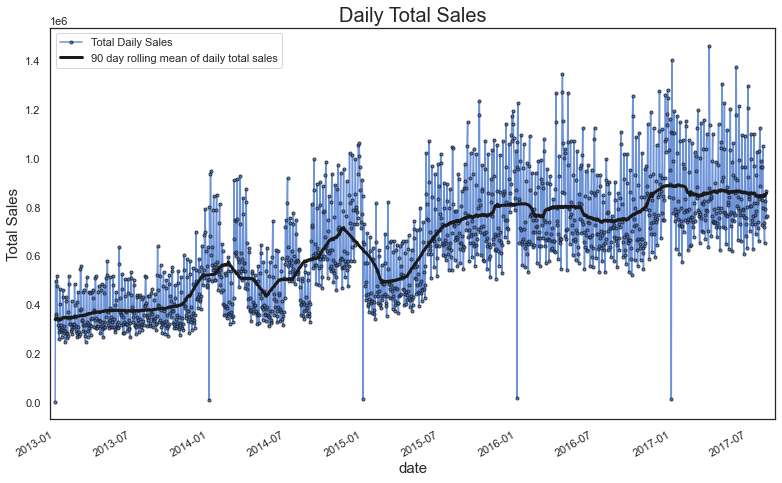

In [105]:
total_daily_sales = train_df.groupby("date")["sales"].sum()

ax = total_daily_sales.plot(
    y = "sales", 
    figsize = (13, 8), 
    marker = ".", 
    alpha = 0.8, 
    mec='k', 
    legend = None
);

total_daily_sales.rolling(window = 90, min_periods = 7, center = True).mean().\
plot(ax=ax, lw = 3, color = "k", legend = None);

plt.legend(labels = ["Total Daily Sales", "90 day rolling mean of daily total sales"])

plt.title("Daily Total Sales");
plt.ylabel("Total Sales");
plt.xlim("2012-12-20", "2017-09-05");

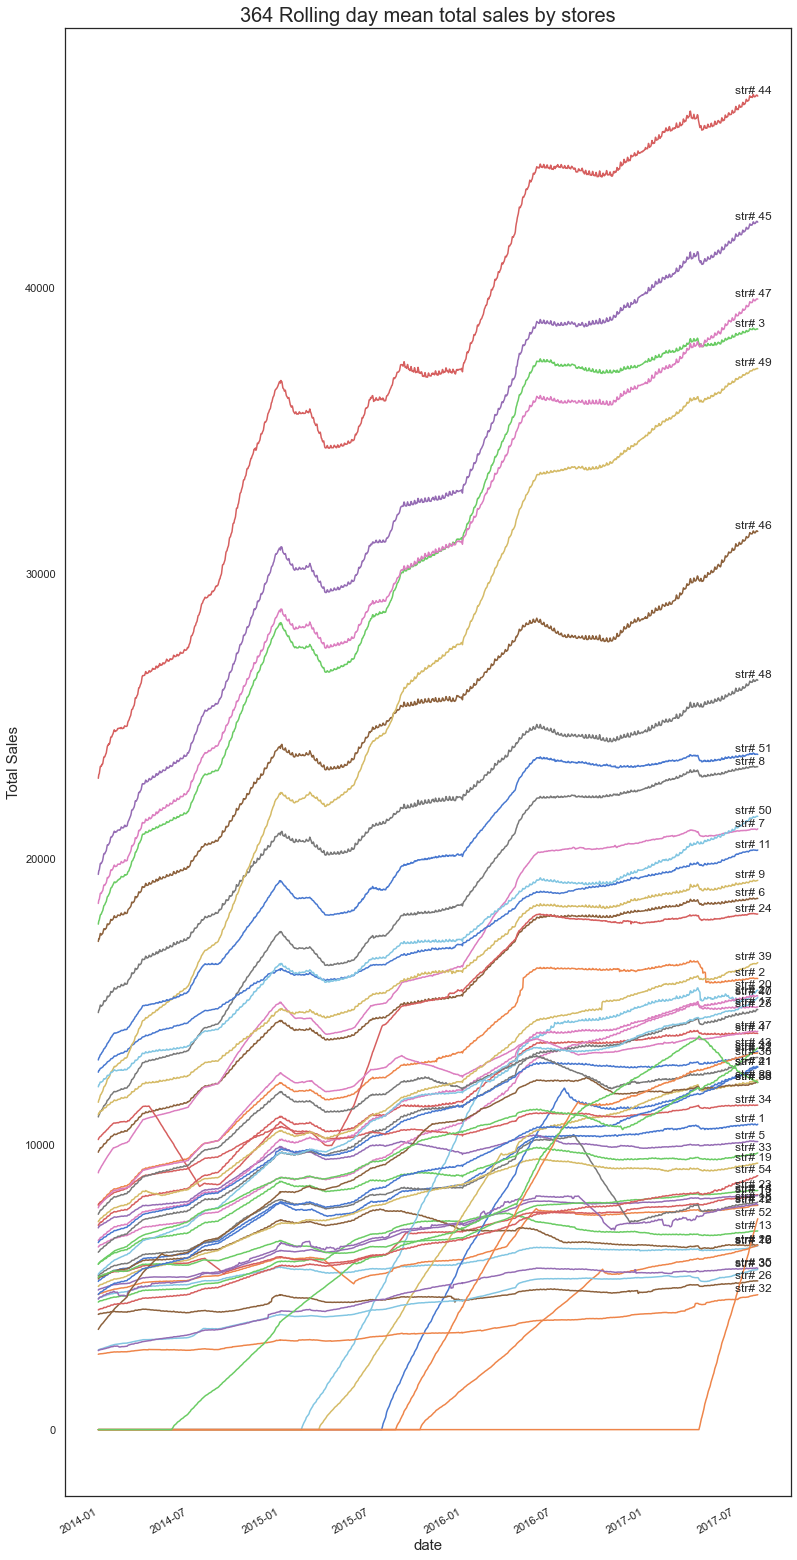

In [28]:
store_total_dly_sales = \
train_df.groupby(["store_nbr", "date"], as_index = False)["sales"].sum()

fig, ax = plt.subplots(figsize = (13, 30))
roll_period = 365

for store in store_total_dly_sales["store_nbr"].unique():
    
    roll_mean = \
    store_total_dly_sales.query(f"store_nbr == {store}").set_index("date").\
    rolling(roll_period)["sales"].mean().to_frame(f"{store}")
    
    roll_mean.plot(ax=ax, legend = None);
    
    xy_coord = roll_mean.reset_index().iloc[-1, :].values
    
    ax.annotate(
        text = f"str# {store}", 
        xy = xy_coord, 
        xytext = xy_coord+np.array([-pd.Timedelta("45 days"), 100])
    );
    
plt.ylabel("Total Sales");
plt.title("364 Rolling day mean total sales by stores");

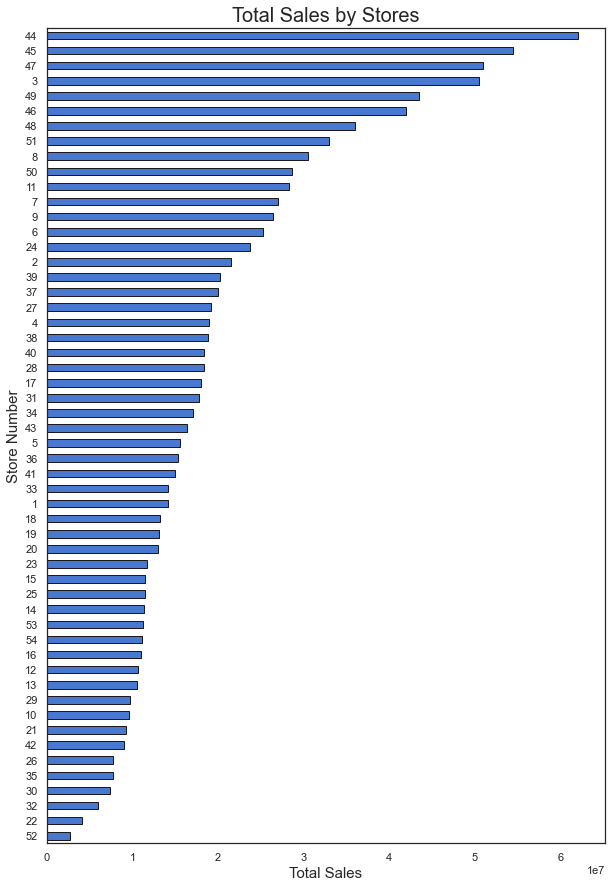

In [29]:
fig, ax = plt.subplots(figsize = (10, 15))

train_df.groupby("store_nbr")["sales"].sum().sort_values().\
plot(kind = "barh", ax = ax, edgecolor = "k", title = "Total Sales by Stores");

ax.set_xlabel("Total Sales");
ax.set_ylabel("Store Number");

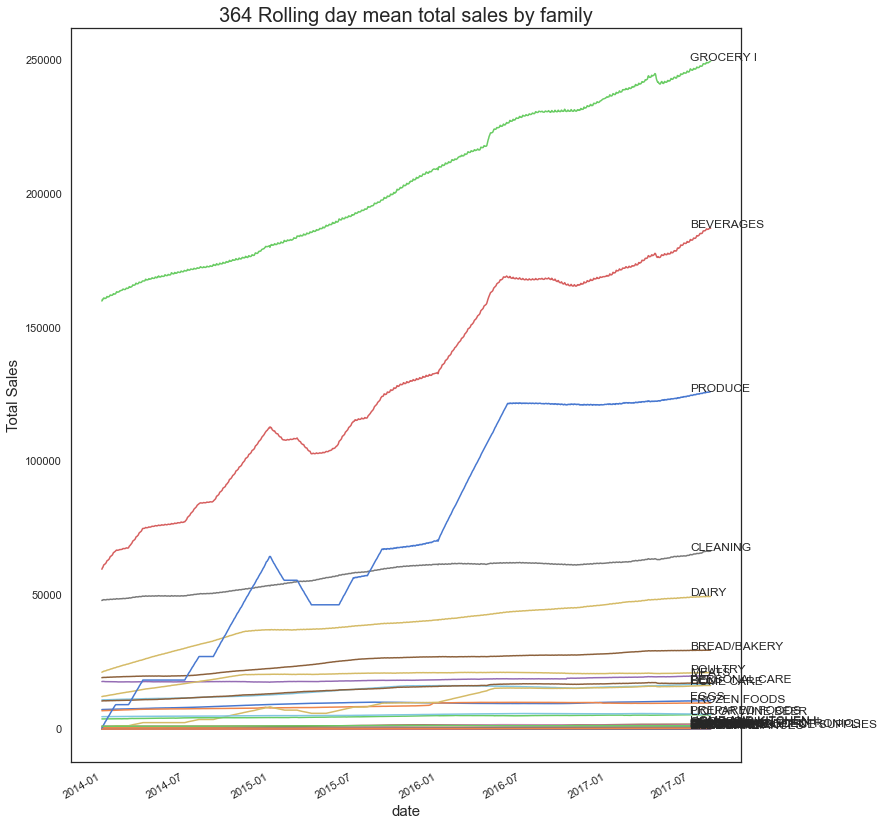

In [30]:
family_total_dly_sales = \
train_df.groupby(["family", "date"], as_index = False)["sales"].sum()

fig, ax = plt.subplots(figsize = (12, 15))
roll_period = 365

for prd in family_total_dly_sales["family"].unique():
    
    roll_mean = \
    family_total_dly_sales.query(f"family == '{prd}'").set_index("date").\
    rolling(roll_period)["sales"].mean().to_frame(f"{prd}")
    
    roll_mean.plot(ax=ax, legend = None);
    
    xy_coord = roll_mean.reset_index().iloc[-1, :].values
    
    ax.annotate(
        text = prd, 
        xy = xy_coord, 
        xytext = xy_coord+np.array([-pd.Timedelta("45 days"), 100])
    );
    
plt.ylabel("Total Sales");
plt.title("364 Rolling day mean total sales by family");

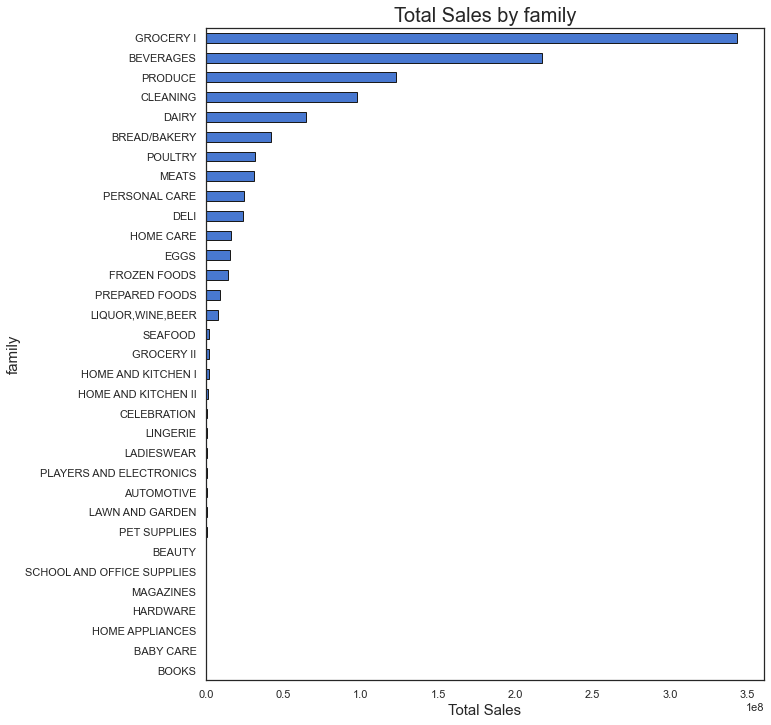

In [31]:
fig, ax = plt.subplots(figsize = (10, 12))

train_df.groupby("family")["sales"].sum().sort_values().\
plot(kind = "barh", ax = ax, edgecolor = "k", title = "Total Sales by family");

ax.set_xlabel("Total Sales");
ax.set_ylabel("family");

# Visualizing Total Sales by type of days

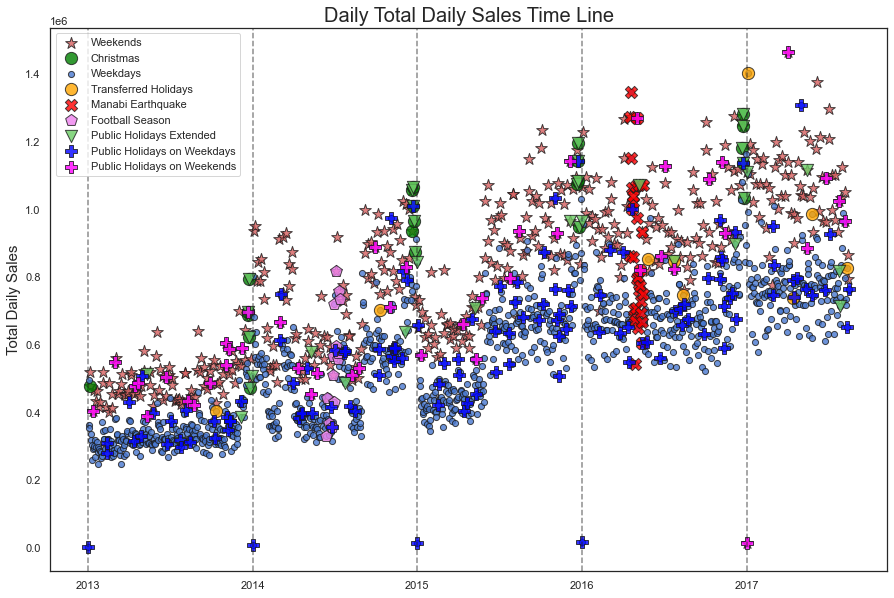

In [32]:
weekends = set(train_df.loc[train_df["is_weekend"], "date"])
transfer_dates = set(holiday_df.loc[holiday_df["type"].eq("Transfer"), "date"])
earthquake = set(holiday_df.loc[holiday_df["description"].str.contains(r'Terremoto Manabi'), "date"])
futbol = set(holiday_df.loc[holiday_df["description"].str.contains(r'futbol'), "date"])
add_holidays = set(holiday_df.loc[holiday_df["type"].eq("Additional"), "date"])
christmas = set(holiday_df.loc[holiday_df["description"].str.contains(r'navidad', case = False), "date"])

remaining_holidays = \
set(
    holiday_df.loc[
        ~holiday_df["description"].str.contains(r'navidad', case = False) & 
        ~holiday_df["description"].str.contains(r'Terremoto Manabi') &
        ~holiday_df["description"].str.contains(r'futbol') &
        holiday_df["type"].ne("Transfer") & holiday_df["type"].ne("Additional"), 
        "date"
    ]
 )

#####################################################################################################
fig, ax = plt.subplots(figsize = (15, 10))
args = dict(x = "date", y = "sales", kind = "scatter", edgecolor = "k", ax = ax, alpha = 0.8, s = 150)

#weekends
total_daily_sales[total_daily_sales.index.isin(weekends)].reset_index().\
plot(**args, marker = "*", color = "r", label = "Weekends");

#christmas
total_daily_sales[total_daily_sales.index.isin(christmas)].reset_index().\
plot(**args, color = "green", label = "Christmas");

#Weekdays
total_daily_sales[
    ~total_daily_sales.index.isin(weekends) & ~total_daily_sales.index.isin(christmas)
].reset_index().plot(**args, color = "b", label = "Weekdays", marker = ".");

#Transferred Holidays
total_daily_sales[total_daily_sales.index.isin(transfer_dates)].reset_index().\
plot(**args, color = "orange", label = "Transferred Holidays");

#Earthquake Event
total_daily_sales[total_daily_sales.index.isin(earthquake)].reset_index().\
plot(**args, color = "red", marker = "X", label = "Manabi Earthquake");

#Footbal Event
total_daily_sales[total_daily_sales.index.isin(futbol)].reset_index().\
plot(**args, color = "violet", marker = "p", label = "Football Season");

#Extended Public Holidays
total_daily_sales[total_daily_sales.index.isin(add_holidays)].reset_index().\
plot(**args, color = "g", marker = "v", label = "Public Holidays Extended");

total_daily_sales[
    total_daily_sales.index.isin(remaining_holidays) & ~total_daily_sales.index.isin(weekends)
].reset_index().\
plot(**args, color = "blue", marker = "P", label = "Public Holidays on Weekdays");

total_daily_sales[
    total_daily_sales.index.isin(remaining_holidays) & total_daily_sales.index.isin(weekends)
].reset_index().\
plot(**args, color = "magenta", marker = "P", label = "Public Holidays on Weekends");

# ax.set_ylim(0.2*10**6); # to ignore new year sales and to zoom in more to the actual plot
ax.set_ylabel("Total Daily Sales");
ax.set_xlabel("");
ax.set_title("Daily Total Daily Sales Time Line");

for newyear in pd.date_range("2013-01-01", "2017-01-01", freq = "YS"):
    ax.axvline(newyear, color = "k", alpha = 0.5, ls = "--");

In [34]:
total_daily_sales = total_daily_sales.to_frame()

total_daily_sales.loc[total_daily_sales.index.isin(weekends), "is_weekends"] = True
total_daily_sales.loc[total_daily_sales.index.isin(christmas), "is_christmas"] = True
total_daily_sales.loc[total_daily_sales.index.isin(transfer_dates), "is_transfereed"] = True
total_daily_sales.loc[total_daily_sales.index.isin(earthquake), "is_earthquake"] = True
total_daily_sales.loc[total_daily_sales.index.isin(futbol), "is_footbal_event"] = True
total_daily_sales.loc[total_daily_sales.index.isin(add_holidays), "is_add_holidays"] = True

total_daily_sales.loc[
    total_daily_sales["is_weekends"].isna() & total_daily_sales.index.isin(remaining_holidays), 
    "is_weekday_holiday"
] = True

total_daily_sales.loc[
    total_daily_sales["is_weekends"].eq(True) & total_daily_sales.index.isin(remaining_holidays), 
    "is_weekend_holiday"
] = True

total_daily_sales.loc[
    total_daily_sales["is_weekends"].isna() & ~total_daily_sales.index.isin(remaining_holidays), 
    "is_weekday"
] = True

total_daily_sales.head()

sales is_weekends is_christmas is_transfereed  \
date                                                                
2013-01-01    2511.618999         NaN          NaN            NaN   
2013-01-02  496092.417944         NaN          NaN            NaN   
2013-01-03  361461.231124         NaN          NaN            NaN   
2013-01-04  354459.677093         NaN          NaN            NaN   
2013-01-05  477350.121229        True         True            NaN   

           is_earthquake is_footbal_event is_add_holidays is_weekday_holiday  \
date                                                                           
2013-01-01           NaN              NaN             NaN               True   
2013-01-02           NaN              NaN             NaN                NaN   
2013-01-03           NaN              NaN             NaN                NaN   
2013-01-04           NaN              NaN             NaN                NaN   
2013-01-05           NaN              NaN             NaN                NaN   

           is_weekend_holiday is_weekday  
date                                      
2013-01-01                NaN        NaN  
2013-01-02                NaN       True  
2013-01-03                NaN       True  
2013-01-04                NaN       True  
2013-01-05                NaN        NaN

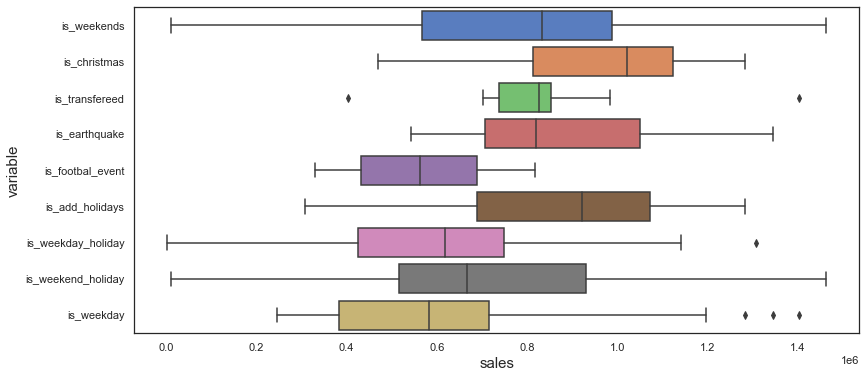

In [35]:
daytype_sales = \
total_daily_sales.melt(id_vars = "sales").dropna().drop("value", axis = 1)

plt.figure(figsize = (13, 6))

sns.boxplot(
    x = "sales",
    y = "variable",
    data = daytype_sales,
    orient = "h"
);

In [36]:
train_df_storetype = \
train_df.merge(store_groups, on = "store_nbr").\
groupby(["date", "type"], as_index = False)["sales"].sum()

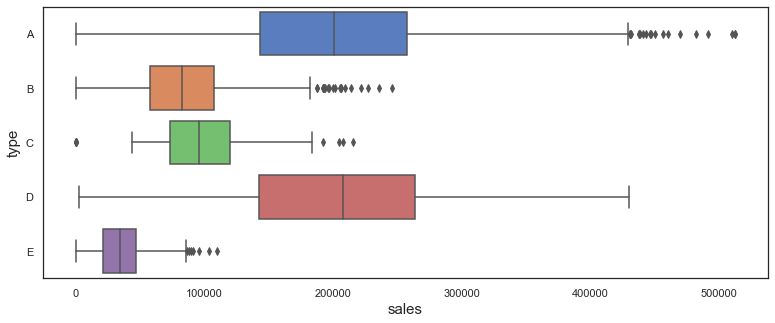

In [37]:
fig, ax = plt.subplots(figsize = (13, 5))

sns.boxplot(
    x = "sales",
    y = "type",
    data = train_df_storetype,
    orient = "h"
);

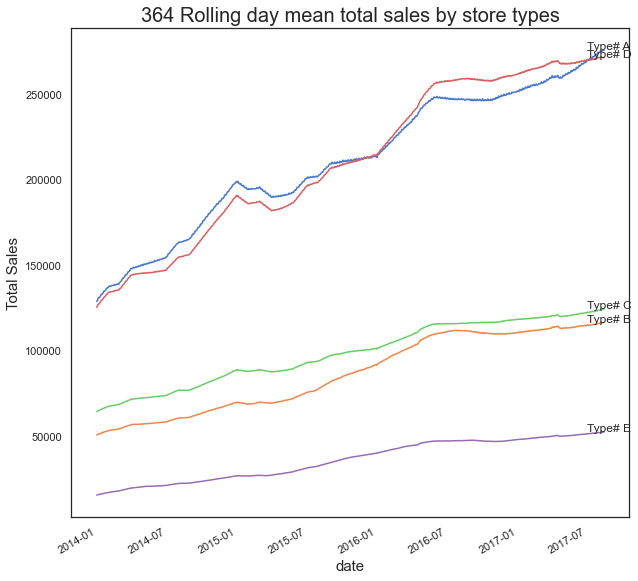

In [38]:
fig, ax = plt.subplots(figsize = (10, 10))
roll_period = 365

for store in train_df_storetype["type"].unique():
    
    roll_mean = \
    train_df_storetype.query(f"type == '{store}'").set_index("date").\
    rolling(roll_period)["sales"].mean().to_frame(f"{store}")
    
    roll_mean.plot(ax=ax, legend = None);
    
    xy_coord = roll_mean.reset_index().iloc[-1, :].values
    
    ax.annotate(
        text = f"Type# {store}", 
        xy = xy_coord, 
        xytext = xy_coord+np.array([-pd.Timedelta("45 days"), 100])
    );
    
plt.ylabel("Total Sales");
plt.title("364 Rolling day mean total sales by store types");

# Promotion

In [41]:
train_df["is_promotion"] = np.where(train_df["onpromotion"].eq(0), 0, 1)

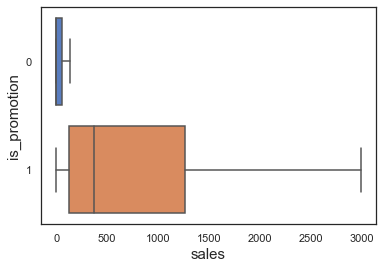

In [44]:
sns.boxplot(
    x = "sales",
    y = "is_promotion",
    data = train_df,
    orient = "h",
    showfliers=False
);

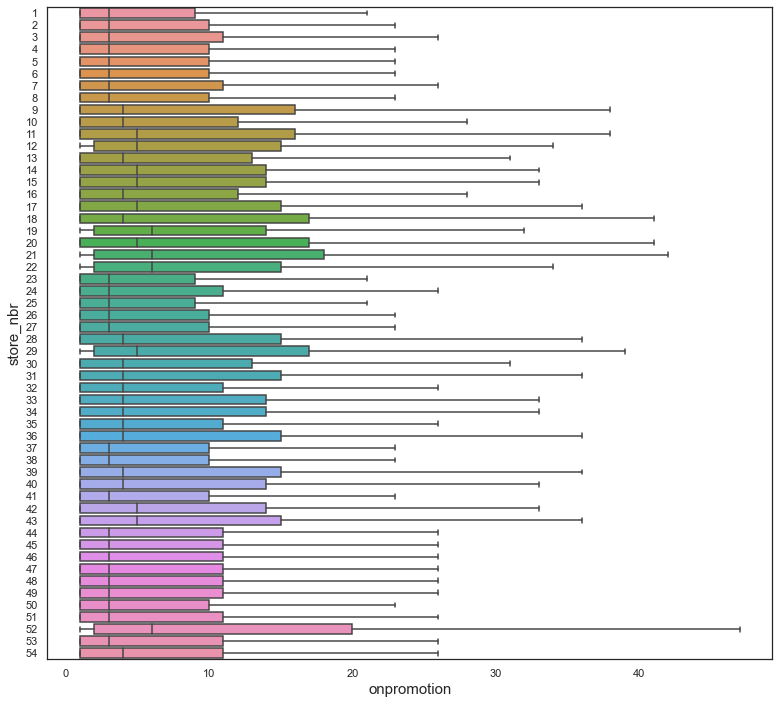

In [69]:
plt.figure(figsize = (13, 12))

sns.boxplot(
    x = "onpromotion",
    y = "store_nbr",
    data = train_df.query("is_promotion == 1"),
    orient = "h",
    showfliers=False
);

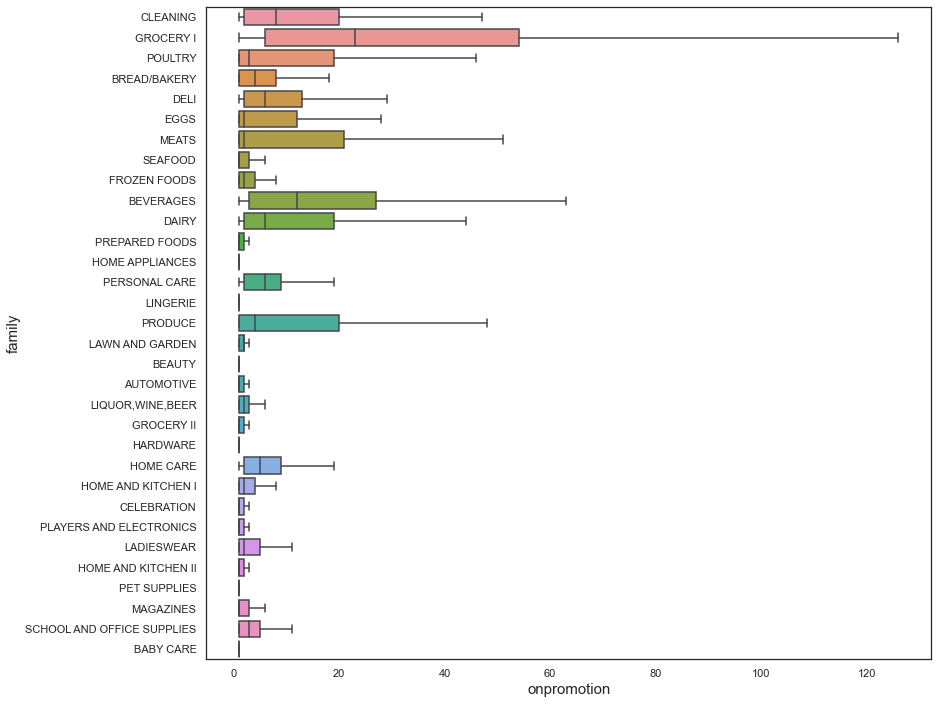

In [70]:
plt.figure(figsize = (13, 12))

sns.boxplot(
    x = "onpromotion",
    y = "family",
    data = train_df.query("is_promotion == 1"),
    orient = "h",
    showfliers=False
);

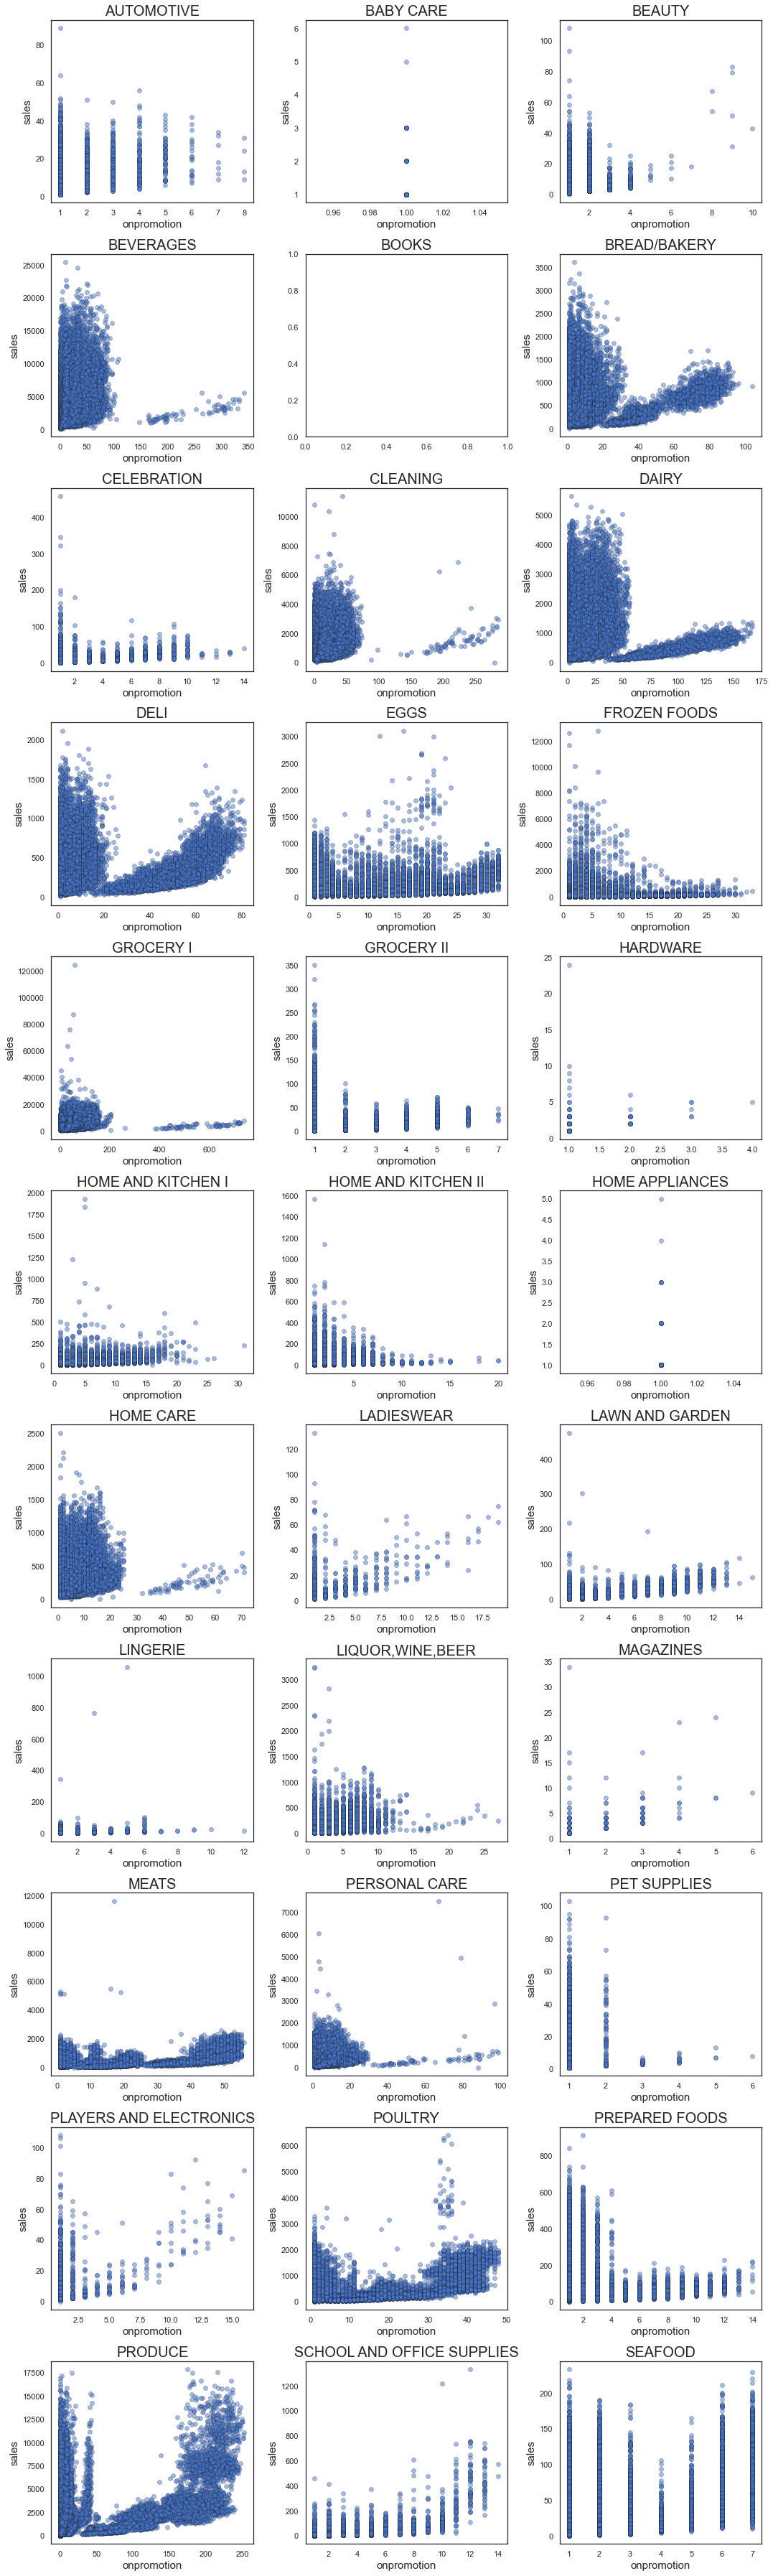

In [77]:
fig, axes = plt.subplots(11, 3, tight_layout = True, figsize = (15, 50))

for prd, ax in zip(train_df["family"].unique(), axes.flatten()):
    
    sns.scatterplot(
        x = "onpromotion",
        y = "sales",
        data = train_df.query(f"is_promotion == 1 and family == '{prd}'"),
        edgecolor = "k",
        alpha = 0.5,
#         hue = "store_nbr",
        ax = ax
    );
    
    ax.set_title(prd)

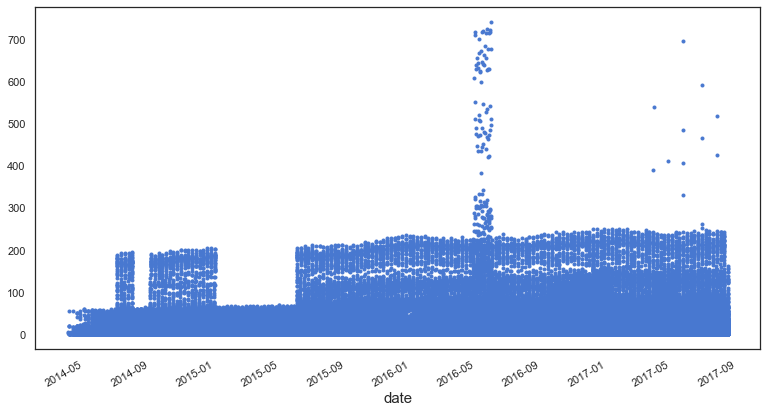

In [102]:
train_df.query("onpromotion > 0").\
plot(x = "date", y = "onpromotion", figsize = (13, 7), linestyle = "", marker = ".", legend = None);

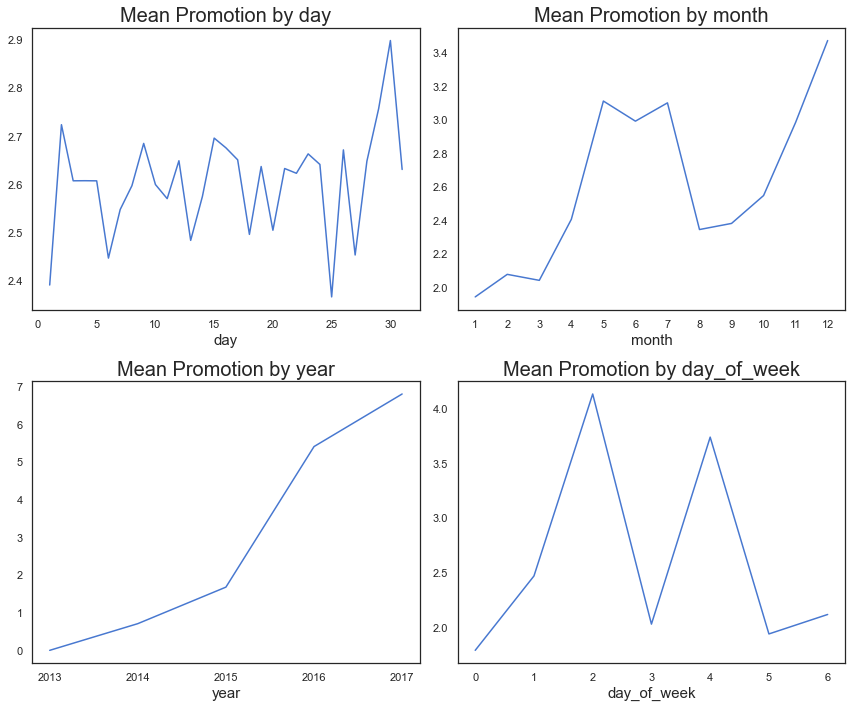

In [101]:
fig, axes = plt.subplots(2, 2, tight_layout = True, figsize = (12, 10))

for col, ax in zip(["day", "month", "year", "day_of_week"], axes.flatten()):
    
    train_df.groupby(col)["onpromotion"].mean().plot(ax = ax);
    ax.set_title(f"Mean Promotion by {col}");
    
    if col in ["year", "month"]:
        ax.set_xticks(train_df.groupby(col)["onpromotion"].mean().index)

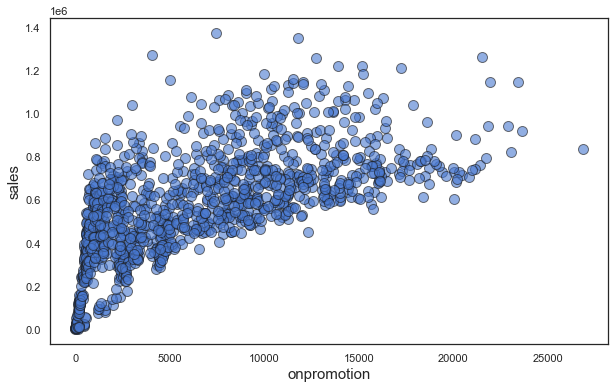

In [125]:
total_sales_promot = \
train_df.query("onpromotion != 0").groupby("date")[["sales", "onpromotion"]].sum()

total_sales_promot.plot(
    x = "onpromotion", 
    y = "sales", 
    kind = "scatter", 
    color = "b", 
    figsize = (10, 6),
    edgecolor = "k",
    marker = "o",
    alpha = 0.6,
    s = 100
);

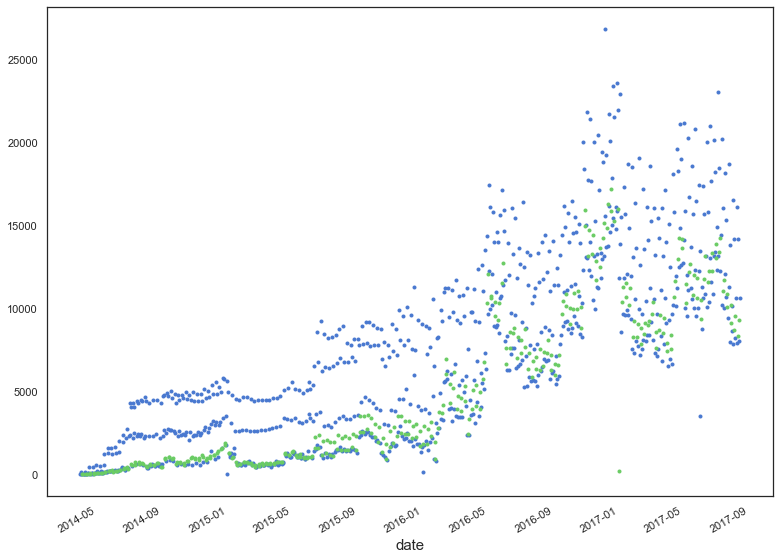

In [208]:
total_sales_promot["is_weekend"] = total_sales_promot.index.dayofweek > 4

fig, ax = plt.subplots(figsize = (13, 10))

total_sales_promot.query("is_weekend == False").\
plot(y = "onpromotion", linestyle = "", marker = ".", legend = None, color = "b", ax = ax);

total_sales_promot.query("is_weekend == True").\
plot(y = "onpromotion", linestyle = "", marker = ".", legend = None, color = "g", ax = ax);


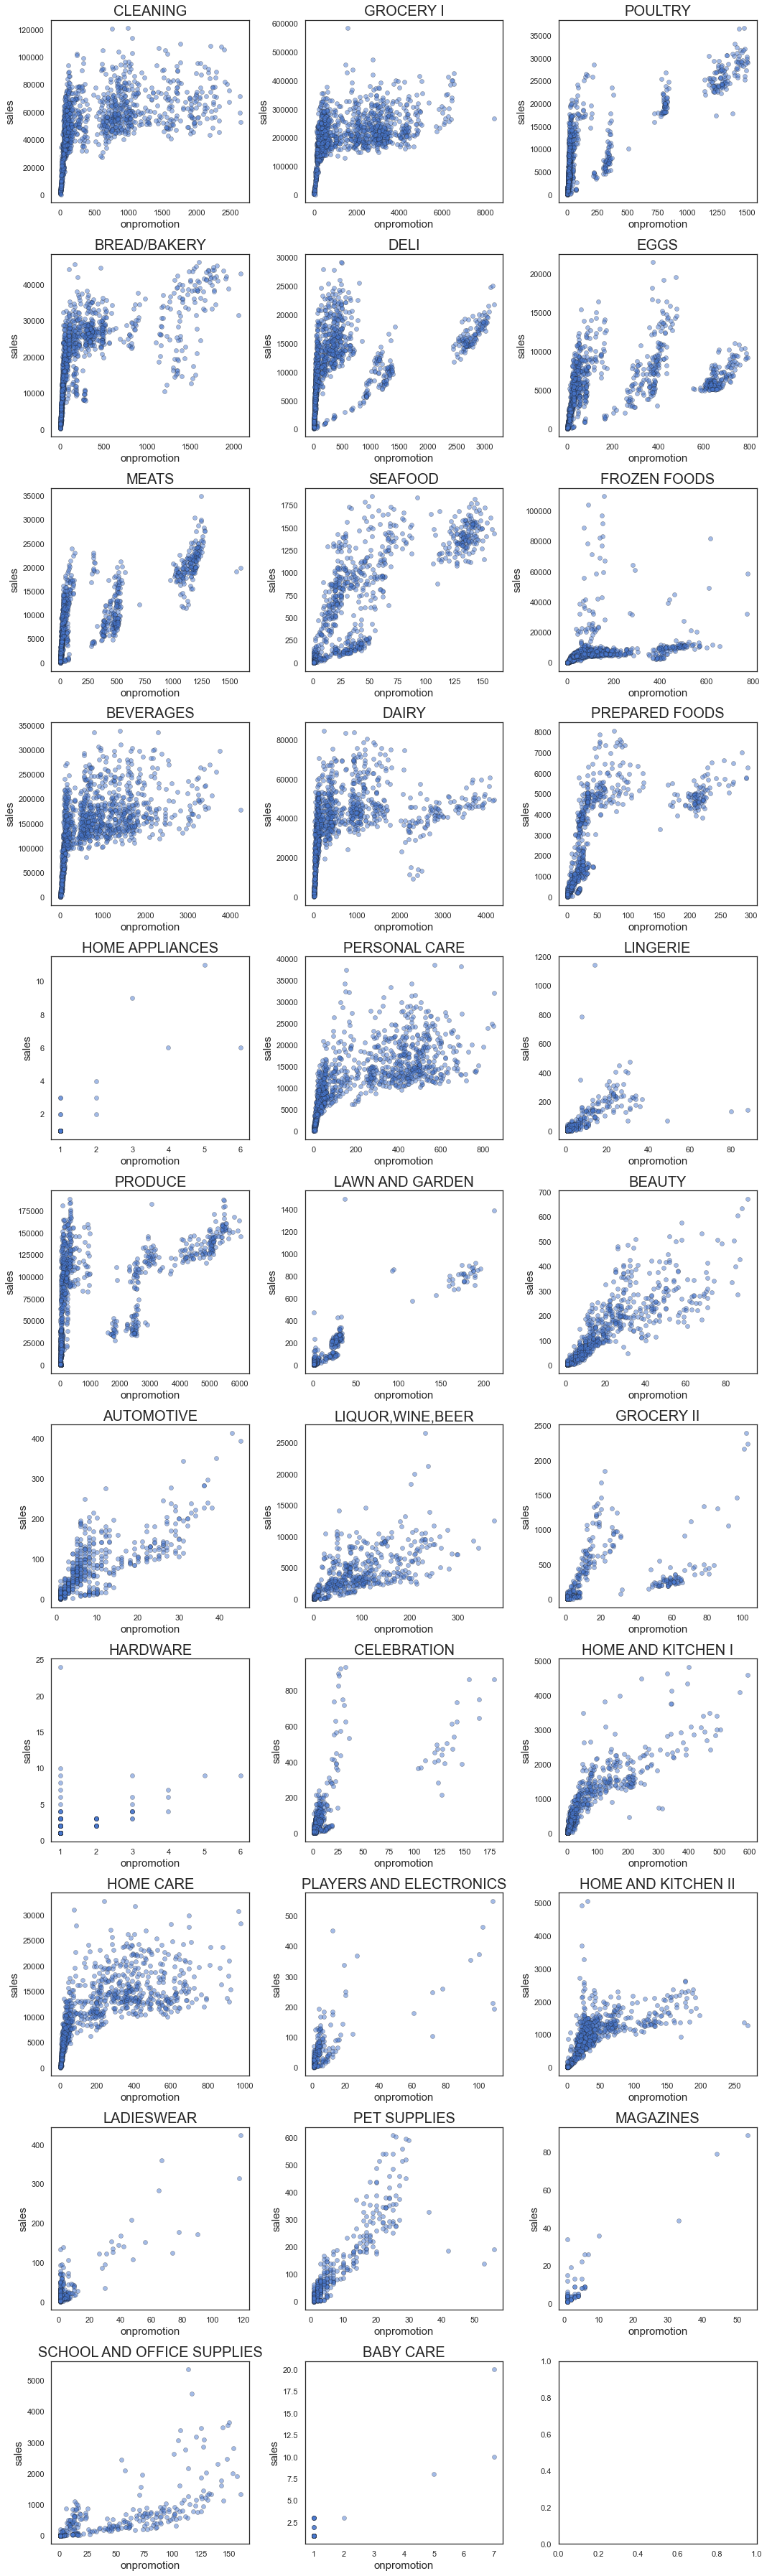

In [163]:
tot_sales_promot_family = \
train_df.query("onpromotion != 0").\
groupby(["date", "family"], as_index = False)[["sales", "onpromotion"]].sum()

fig, axes = plt.subplots(11, 3, tight_layout = True, figsize = (15, 50))

for prd, ax in zip(tot_sales_promot_family["family"].unique(), axes.flatten()):
    
    sns.scatterplot(
        x = "onpromotion",
        y = "sales",
        data = tot_sales_promot_family.query(f"family == '{prd}'"),
        edgecolor = "k",
        alpha = 0.5,
#         hue = "store_nbr",
        ax = ax
    );
    
    ax.set_title(prd)

<AxesSubplot:xlabel='date'>

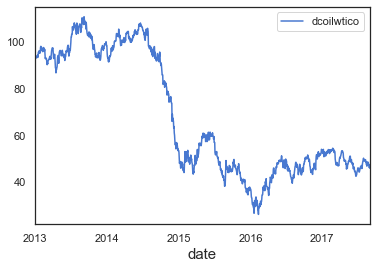

In [172]:
oil_df_imputed.plot()

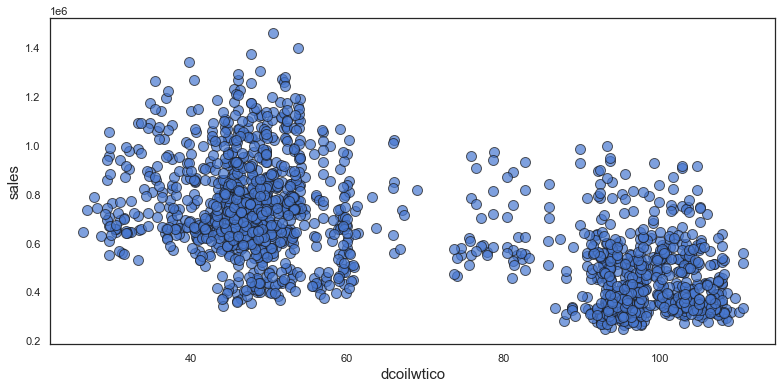

In [210]:
train_df.groupby("date")["sales"].sum().to_frame().\
join(oil_df_imputed).fillna(method = "ffill").\
query("sales > 200000").\
plot(x = "dcoilwtico", y = "sales", kind = "scatter", s = 100, edgecolor = "k", alpha = 0.7, color = "b", 
     figsize = (13, 6));